# Library

In [217]:
import numpy as np, os
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#한글설정
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
# "axes.unicode_minus" : 마이너스가 깨질 것을 방지

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [2]:
# guri 
g_all_df = pd.read_csv('/project/guri/Restart/reverse_FI.csv')
g_df_d1d5 = pd.read_csv('/project/guri/Restart/reverse_FI_d1d5.csv')
g_df_d6d10= pd.read_csv('/project/guri/Restart/reverse_FI_d6d10.csv')

In [3]:
base_value = g_all_df[g_all_df['feature']=='BASELINE']['bce'].values[0]
g_all_df['base'] = base_value
g_all_df['diff'] = g_all_df['bce']-g_all_df['base']
g_all_df.head(20)

,feature,bce,base,diff
0,409606211,1.555772,1.204867,0.350904
1,51479005520,1.452610,1.204867,0.247743
2,67434504,1.417650,1.204867,0.212783
3,74606211,1.412228,1.204867,0.207361
4,59011010325,1.409537,1.204867,0.204670
5,54858516,1.394360,1.204867,0.189493
6,50927,1.393359,1.204867,0.188492
7,409115170,1.392989,1.204867,0.188121
8,83000730,1.390225,1.204867,0.185358
9,2411260,1.384369,1.204867,0.179501


In [4]:
top20 = list(g_all_df['feature'].values)[:20] 
top20

['409606211',
 '51479005520',
 '67434504',
 '74606211',
 '59011010325',
 '54858516',
 '50927',
 '409115170',
 '83000730',
 '2411260',
 '51148',
 '10019021302',
 '85061305',
 '49669521303',
 '2411733',
 '74621511',
 '71053523',
 '17314940002',
 '6074961',
 '62856024641']

In [5]:
total_data = pd.read_csv('total_data_7727.csv')
top20 = list(map(int,list(g_all_df['feature'].values)[:20]))
top20_df = total_data[total_data['ITEMID'].isin(top20)]
top20_df

,SUBJECT_ID,ITEMID,CHARTTIME,TYPE
1711,21,74606211,2135-02-06,PRE
1719,21,74606211,2135-02-07,PRE
1727,21,74606211,2135-02-08,PRE
2141,31,74606211,2108-08-30,PRE
2142,31,74606211,2108-08-30,PRE
...,...,...,...,...
9146929,99464,409606211,2146-04-10,PRE
9146936,99464,409606211,2146-04-11,PRE
9158943,99817,50927,2166-11-04,LAB
9159749,99817,409606211,2166-11-20,PRE


In [6]:
# LSH
all_df = pd.read_csv('all_df.csv')
df_d1d5 = pd.read_csv('df_d1d5.csv')
df_d6d10 = pd.read_csv('df_d6d10.csv')

# All reversed

In [46]:
# LSH
all_df = all_df.sort_values(by='diff',ascending=False)
all_df['feature'][:10].values

array([  409606211,    74606211,    67434504,    54817525, 10019055302,
          54858516,    74706811,    45006701,      228125, 63323016501])

In [47]:
# guri
g_all_df['feature'][:10].values

array(['409606211', '51479005520', '67434504', '74606211', '59011010325',
       '54858516', '50927', '409115170', '83000730', '2411260'],
      dtype=object)

In [91]:
# LSH_best
df_all_best = pd.read_csv('df_all_best.csv')
df_all_best = df_all_best.sort_values(by='diff',ascending=False)
df_all_best['feature'][:10].values

array([  409606211,    74606211,    67434504,    54817525, 10019055302,
            227194,    54858516,    74706811,    45006701,     4003822])

# 1 ~ 5 reversed

In [45]:
# LSH
df_d1d5 = df_d1d5.sort_values(by='diff',ascending=False)
df_d1d5['feature'][:10].values

array([  409606211,    74606211,    67434504,    54817525, 10019055302,
          54858516,    74706811,    45006701,      228125, 63323016501])

In [44]:
# guri
base_value = g_df_d1d5[g_df_d1d5['feature']=='BASELINE']['bce'].values[0]
g_df_d1d5['base'] = base_value
g_df_d1d5['diff'] = g_df_d1d5['bce']-g_df_d1d5['base']

g_df_d1d5['feature'][:10].values

array(['409606211', '51479005520', '74606211', '67434504', '59011010325',
       '54858516', '50927', '409115170', '83000730', '2411260'],
      dtype=object)

In [43]:
# LSH_best
df_d1d5_best = pd.read_csv('df_d1d5_best.csv')
df_d1d5_best = df_d1d5_best.sort_values(by='diff',ascending=False)
df_d1d5_best['feature'][:10].values

array([     227194,       50889,       51200,   182138167,   517293025,
           4003822,       51362, 63323038810,       51143,   904585461])

# 6 ~ 10 reversed

In [40]:
# LSH
df_d6d10 = df_d6d10.sort_values(by='diff',ascending=False)
df_d6d10['feature'][:10].values

array([  409606211,    74606211,    67434504,    54817525, 10019055302,
          54858516,    74706811,    45006701,      228125, 63323016501])

In [41]:
# GURI
base_value = g_df_d6d10[g_df_d6d10['feature']=='BASELINE']['bce'].values[0]
g_df_d6d10['base'] = base_value
g_df_d6d10['diff'] = g_df_d6d10['bce']-g_df_d6d10['base']

g_df_d6d10['feature'][:10].values

array(['51479005520', '409606211', '10019021302', '51148', '83000730',
       '59011010325', '49669521303', '121048910', '173024256', '54001920'],
      dtype=object)

In [148]:
# LSH_best
df_d6d10_best = pd.read_csv('df_d6d10_best.csv')
df_d6d10_best = df_d6d10_best.sort_values(by='diff',ascending=False)
df_d6d10_best['feature'][:10].values

array([     227194,       50889,       51200,   182138167,   517293025,
           4003822,       51362, 63323038810,       51143,   904585461])

# All - Top10 그래프
- - 7727명 中 생존 : 4718명 / 생존 : 3009명

In [83]:
x = np.load('x_(7727,10,4068).npy')
total_data = pd.read_csv('total_data_7727.csv')

In [84]:
all_feature = all_df['feature'].tolist()

# LAB, PRE, PRO의 item_list 생성 
LAB_item = total_data[total_data['TYPE']=='LAB']['ITEMID'].unique()
PRE_item = total_data[total_data['TYPE']=='PRE']['ITEMID'].unique()
PRO_item = total_data[total_data['TYPE']=='PRO']['ITEMID'].unique()

LAB_list = []
PRE_list = []
PRO_list = []
for i in all_feature:
    if i in LAB_item:
        LAB_list.append(i)
    elif i in PRE_item:
        PRE_list.append(i)
    else:
        PRO_list.append(i)

## PRE - top10
- best model 아님
- 409606211, 74606211, 67434504, 54817525, 10019055302, 54858516, 74706811, 45006701, 63323016501, 58177025504

In [260]:
# 1) PRE_top10의 index 구하기
PRE_top10 = PRE_list[:10]
item_list = total_data['ITEMID'].unique()

PRE_index = []
for i in PRE_top10:
    a = list(item_list).index(i)
    PRE_index.append(a)
PRE_index

[835, 178, 522, 2298, 1190, 716, 1495, 410, 362, 1304]

In [261]:
# 2-1) 생존자 index 구하는 법 1
n = -1

생존자_index1 = []
while True:
    if list(y)[n+1:].count(1) == 0:
        break
    n += list(y)[n+1:].index(1) + 1
    생존자_index1.append(n)

In [262]:
# 2-2) 생존자 index 구하는 법 2
total_data = pd.read_csv('total_data_7727.csv')
sub7727 = total_data['SUBJECT_ID'].unique()

patient = pd.read_csv('폐렴환자.csv')
patient = patient.sort_values(by='SUBJECT_ID')
patient = patient[patient['SUBJECT_ID'].isin(sub7727)]
sub_1_list = patient[patient['EXPIRE_FLAG']==1]['SUBJECT_ID'].values

생존자_index2 = []
for i in sub_1_list:
    a = list(sub7727).index(i)
    생존자_index2.append(a)

In [267]:
# 3) 생존자 4718명의 D-10 ~ D-1 feature별 abnormal sum 

x_생존자 = x[생존자_index1,:,:]

result = []
for i in PRE_index:
    for j in range(10):
        result.append(x_생존자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_PRE = pd.DataFrame(result)
df_PRE.columns = [f'D-{i}' for i in range(10,0,-1)]
df_PRE.index = PRE_top10

# 생존한 4718명에 대한 비율 계산
for i in PRE_top10:
    df_PRE.loc[f'{i}_생존'] = df_PRE.loc[i].iloc[:-1]/4718 

# df_PRE

In [268]:
# 4) 사망자 3009명의 D-10 ~ D-1 feature별 abnormal sum 

사망자_index = list(set(range(0,7727))-set(생존자_index1))

x_사망자 = x[사망자_index,:,:]

result = []
for i in PRE_index:
    for j in range(10):
        result.append(x_사망자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_PRE_사망자 = pd.DataFrame(result)
df_PRE_사망자.columns = [f'D-{i}' for i in range(10,0,-1)]
df_PRE_사망자.index = PRE_top10

# 사망한 3009명에 대한 비율 계산
for i in PRE_top10:
    df_PRE_사망자.loc[f'{i}_사망'] = df_PRE_사망자.loc[i]/3009 

# df_PRE_사망자

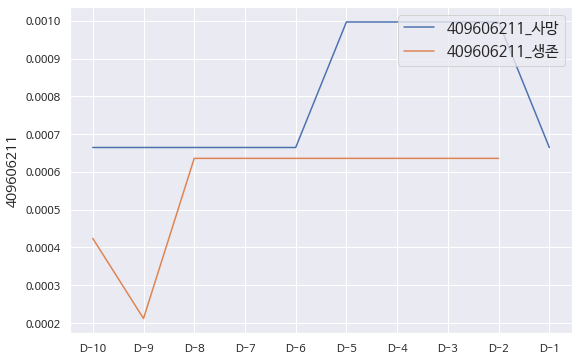

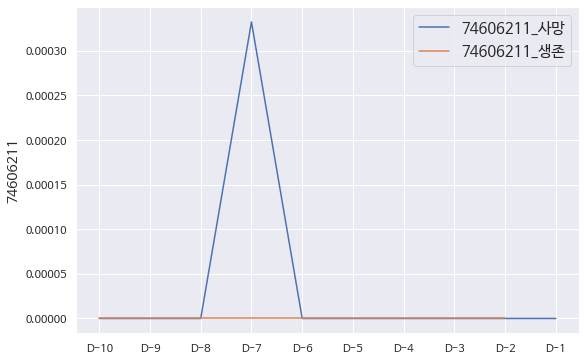

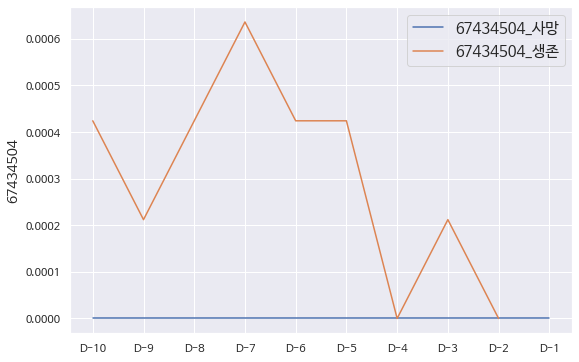

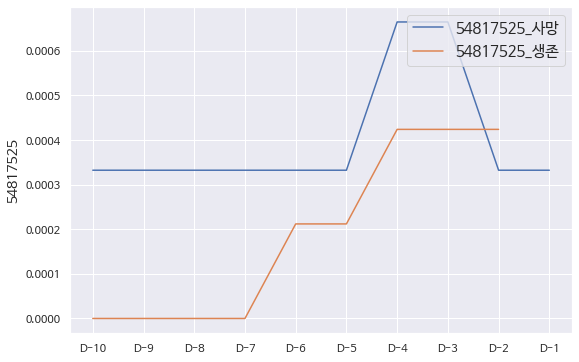

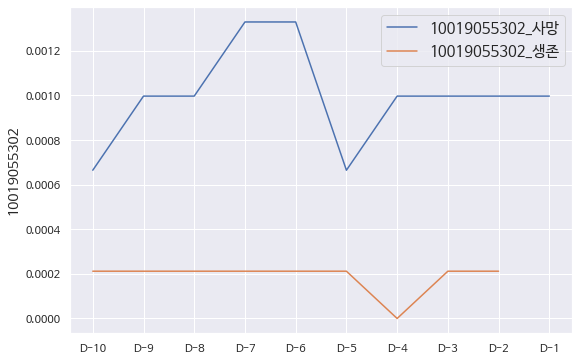

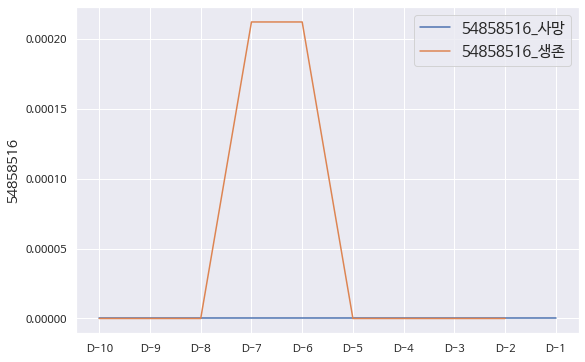

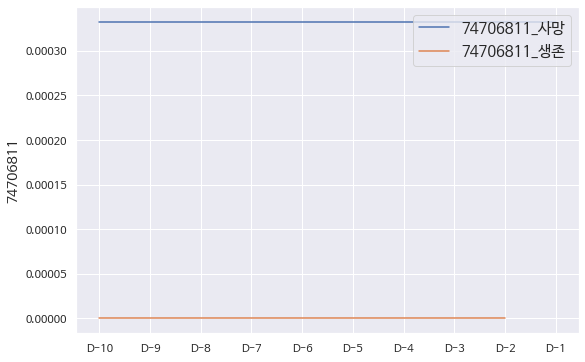

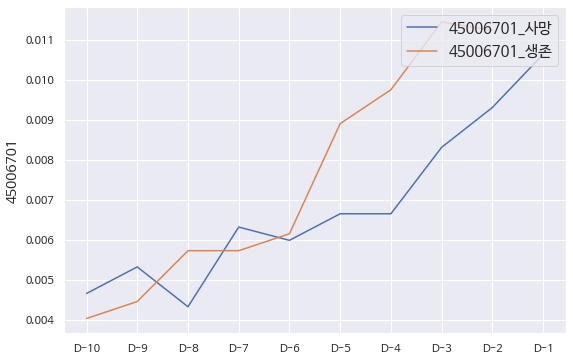

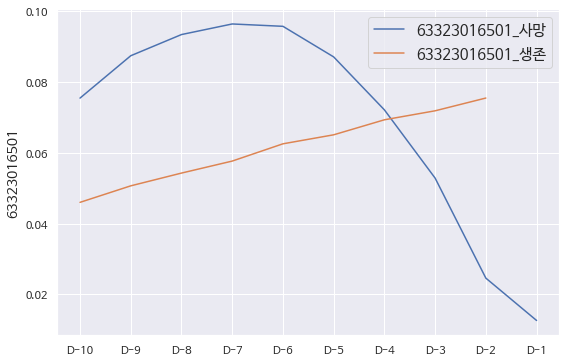

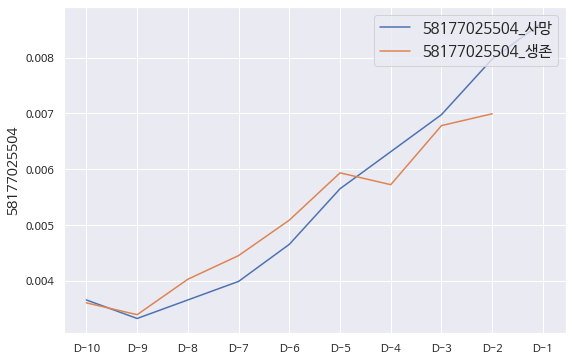

In [266]:
# 5) for문으로 각 feature에 대한 비율 추이 그래프 그리기 

df_PRE_trans = df_PRE.transpose()
df_PRE_사망자_trans = df_PRE_사망자.transpose()

for i in PRE_top10:
    _ = plt.figure(figsize = (9,6))

    p = sns.lineplot(data = df_PRE_사망자_trans, x = df_PRE_사망자_trans.index, y = f'{i}_사망')
    p = sns.lineplot(data = df_PRE_trans, x = df_PRE_trans.index, y = f'{i}_생존')
    _ = p.legend(labels = [f'{i}_사망', f'{i}_생존'], loc = 'upper right', fontsize=15)
    _ = p.set_ylabel(i, fontsize = 14)

## PRO - top10
- 228125, 224270, 227194, 225202, 228127, 228128, 226124, 225794, 225450, 228130

In [114]:
# 1) PRO_top10의 index 구하기
PRO_top10 = PRO_list[:10]
item_list = total_data['ITEMID'].unique()

PRO_index = []
for i in PRO_top10:
    a = list(item_list).index(i)
    PRO_index.append(a)
PRO_index

[1698, 667, 813, 1656, 2984, 1728, 3766, 711, 3458, 3238]

In [ ]:
# 2) 생존자 index 구하기
total_data = pd.read_csv('total_data_7727.csv')
sub7727 = total_data['SUBJECT_ID'].unique()

patient = pd.read_csv('폐렴환자.csv')
patient = patient.sort_values(by='SUBJECT_ID')
patient = patient[patient['SUBJECT_ID'].isin(sub7727)]
sub_1_list = patient[patient['EXPIRE_FLAG']==1]['SUBJECT_ID'].values

생존자_index = []
for i in sub_1_list:
    a = list(sub7727).index(i)
    생존자_index.append(a)

In [269]:
# 3) 생존자 4718명의 D-10 ~ D-1 feature별 abnormal sum 

x_생존자 = x[생존자_index,:,:]

result = []
for i in PRO_index:
    for j in range(10):
        result.append(x_생존자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_PRO = pd.DataFrame(result)
df_PRO.columns = [f'D-{i}' for i in range(10,0,-1)]
df_PRO.index = PRO_top10

# 생존한 4718명에 대한 비율 계산
for i in PRO_top10:
    df_PRO.loc[f'{i}_생존'] = df_PRO.loc[i].iloc[:-1]/4718 

# df_PRO

In [270]:
# 4) 사망자 3009명의 D-10 ~ D-1 feature별 abnormal sum 

사망자_index = list(set(range(0,7727))-set(생존자_index))

x_사망자 = x[사망자_index,:,:]

result = []
for i in PRO_index:
    for j in range(10):
        result.append(x_사망자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_PRO_사망자 = pd.DataFrame(result)
df_PRO_사망자.columns = [f'D-{i}' for i in range(10,0,-1)]
df_PRO_사망자.index = PRO_top10

# 사망한 3009명에 대한 비율 계산
for i in PRO_top10:
    df_PRO_사망자.loc[f'{i}_사망'] = df_PRO_사망자.loc[i]/3009 

# df_PRO_사망자

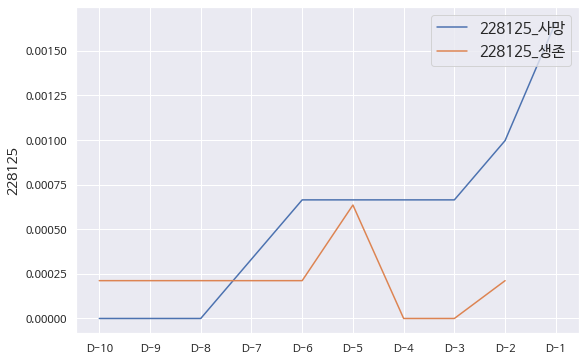

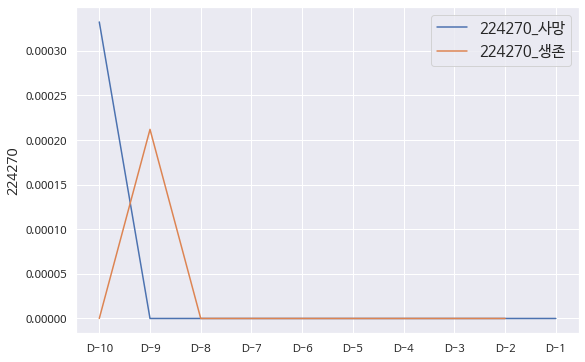

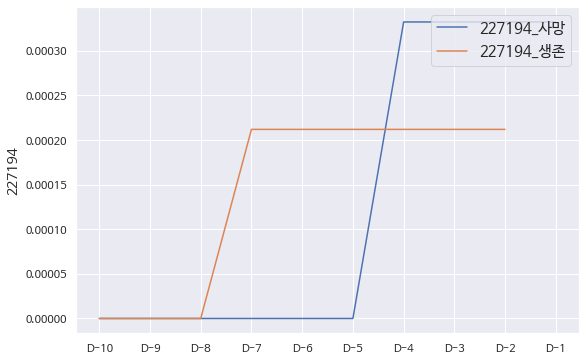

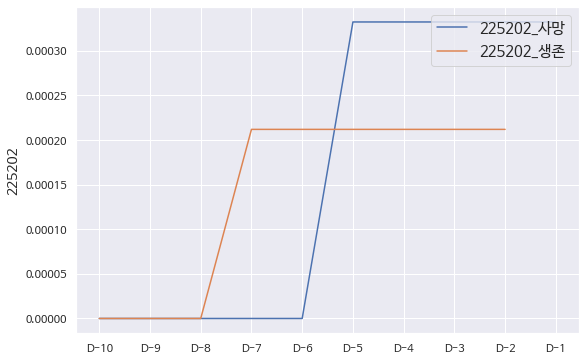

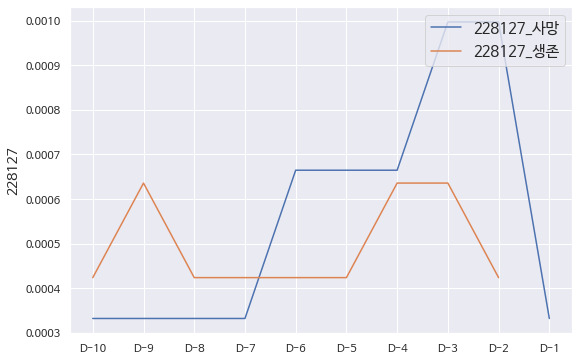

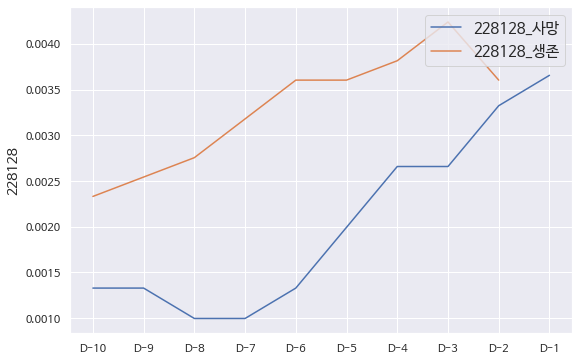

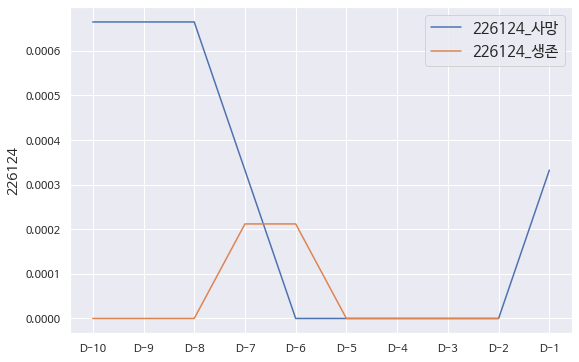

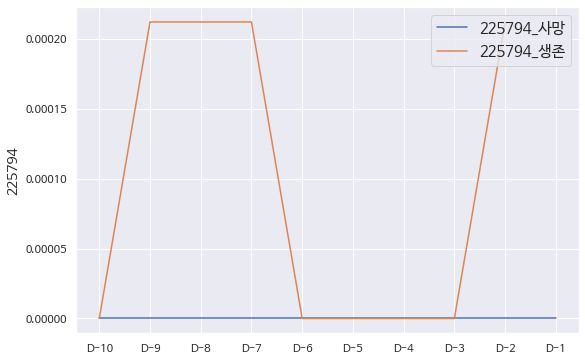

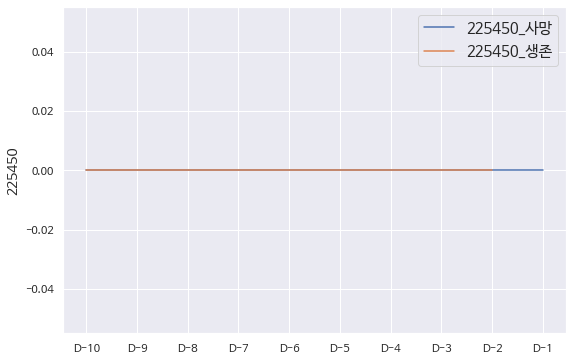

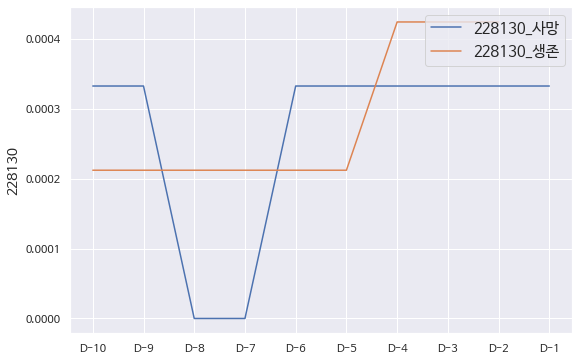

In [272]:
# 5) for문으로 각 feature에 대한 비율 추이 그래프 그리기 

df_PRO_trans = df_PRO.transpose()
df_PRO_사망자_trans = df_PRO_사망자.transpose()

for i in PRO_top10:
    _ = plt.figure(figsize = (9,6))

    p = sns.lineplot(data = df_PRO_사망자_trans, x = df_PRO_사망자_trans.index, y = f'{i}_사망')
    p = sns.lineplot(data = df_PRO_trans, x = df_PRO_trans.index, y = f'{i}_생존')
    _ = p.legend(labels = [f'{i}_사망', f'{i}_생존'], loc = 'upper right', fontsize=15)
    _ = p.set_ylabel(i, fontsize = 14)

## LAB - top10
- 51148, 51003, 50813, 50868, 50889, 50908, 51200, 51482, 51120, 50917

In [274]:
# 1) LAB_top10의 index 구하기
LAB_top10 = LAB_list[:10]
item_list = total_data['ITEMID'].unique()

LAB_index = []
for i in LAB_top10:
    a = list(item_list).index(i)
    LAB_index.append(a)
LAB_index

[476, 70, 10, 72, 284, 69, 257, 403, 670, 445]

In [275]:
# 2) 생존자 index 구하기
total_data = pd.read_csv('total_data_7727.csv')
sub7727 = total_data['SUBJECT_ID'].unique()

patient = pd.read_csv('폐렴환자.csv')
patient = patient.sort_values(by='SUBJECT_ID')
patient = patient[patient['SUBJECT_ID'].isin(sub7727)]
sub_1_list = patient[patient['EXPIRE_FLAG']==1]['SUBJECT_ID'].values

생존자_index = []
for i in sub_1_list:
    a = list(sub7727).index(i)
    생존자_index.append(a)

In [277]:
# 3) 생존자 4718명의 D-10 ~ D-1 feature별 abnormal sum 

x_생존자 = x[생존자_index,:,:]

result = []
for i in LAB_index:
    for j in range(10):
        result.append(x_생존자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_LAB = pd.DataFrame(result)
df_LAB.columns = [f'D-{i}' for i in range(10,0,-1)]
df_LAB.index = LAB_top10

# 생존한 4718명에 대한 비율 계산
for i in LAB_top10:
    df_LAB.loc[f'{i}_생존'] = df_LAB.loc[i].iloc[:-1]/4718 

# df_LAB

In [278]:
# 4) 사망자 3009명의 D-10 ~ D-1 feature별 abnormal sum 

사망자_index = list(set(range(0,7727))-set(생존자_index))

x_사망자 = x[사망자_index,:,:]

result = []
for i in LAB_index:
    for j in range(10):
        result.append(x_사망자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_LAB_사망자 = pd.DataFrame(result)
df_LAB_사망자.columns = [f'D-{i}' for i in range(10,0,-1)]
df_LAB_사망자.index = LAB_top10

# 사망한 3009명에 대한 비율 계산
for i in LAB_top10:
    df_LAB_사망자.loc[f'{i}_사망'] = df_LAB_사망자.loc[i]/3009 

# df_LAB_사망자

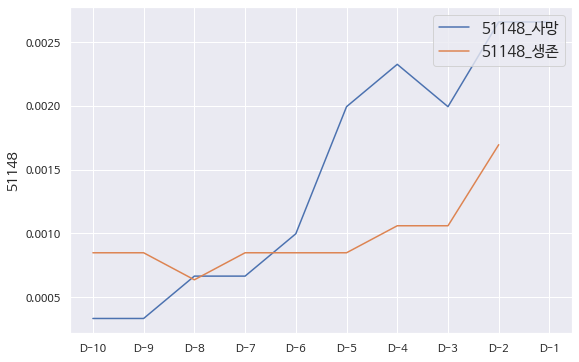

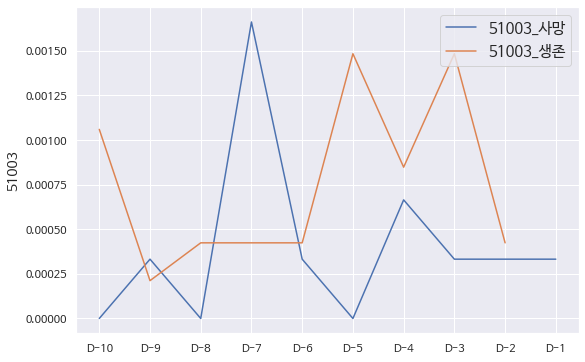

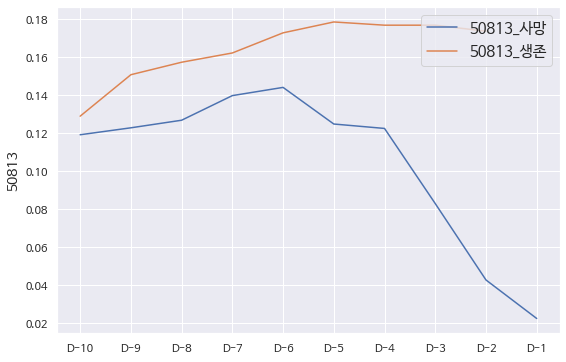

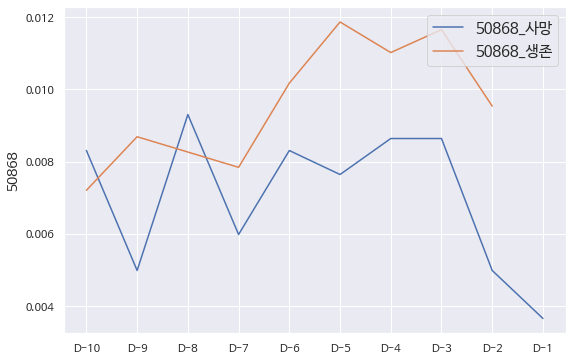

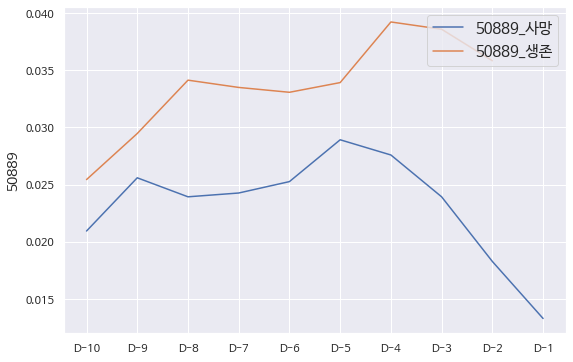

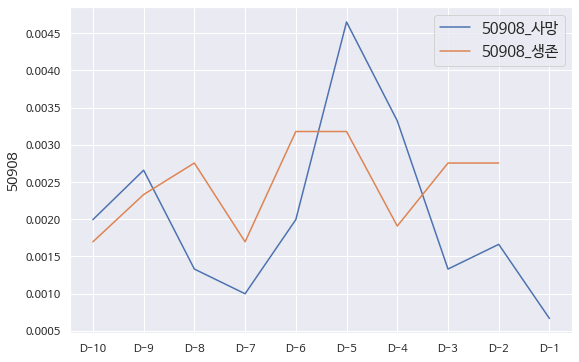

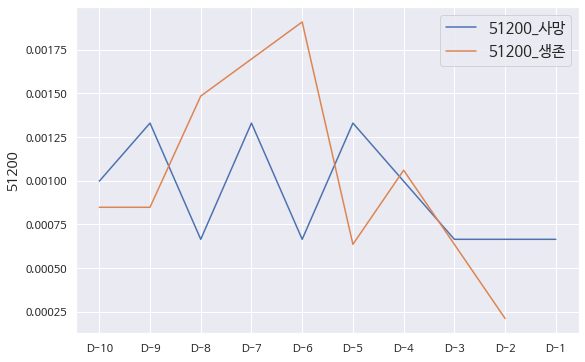

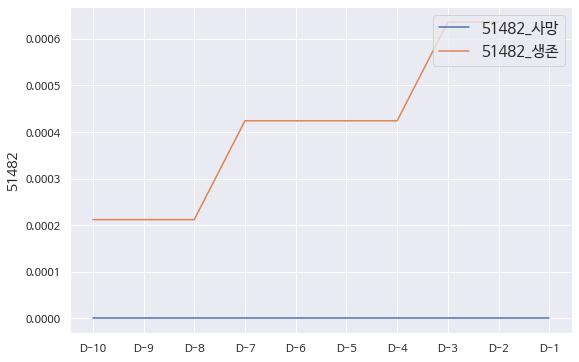

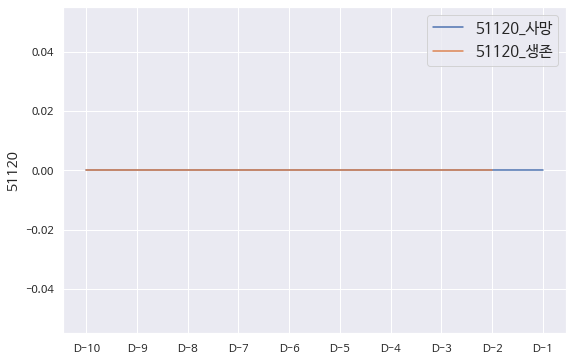

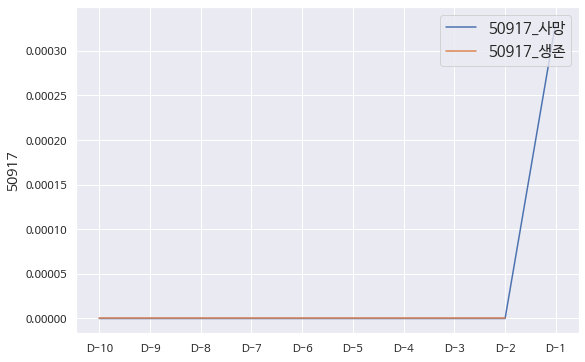

In [280]:
# 5) for문으로 각 feature에 대한 비율 추이 그래프 그리기 

df_LAB_trans = df_LAB.transpose()
df_LAB_사망자_trans = df_LAB_사망자.transpose()

for i in LAB_top10:
    _ = plt.figure(figsize = (9,6))

    p = sns.lineplot(data = df_LAB_사망자_trans, x = df_LAB_사망자_trans.index, y = f'{i}_사망')
    p = sns.lineplot(data = df_LAB_trans, x = df_LAB_trans.index, y = f'{i}_생존')
    _ = p.legend(labels = [f'{i}_사망', f'{i}_생존'], loc = 'upper right', fontsize=15)
    _ = p.set_ylabel(i, fontsize = 14)

# 1 ~ 5 - Top10 그래프
## PRE - top10

In [281]:
x = np.load('x_(7727,10,4068).npy')
total_data = pd.read_csv('total_data_7727.csv')

In [288]:
df_d1d5

,feature,baseline_bce,bce,diff
4067,409606211,1.014362,1.059013,0.044651
4066,74606211,1.014362,1.042943,0.028581
4065,67434504,1.014362,1.039256,0.024894
4064,54817525,1.014362,1.036517,0.022155
4063,10019055302,1.014362,1.035443,0.021081
...,...,...,...,...
4,50912,1.014362,1.010785,-0.003577
3,55390000401,1.014362,1.010189,-0.004173
2,51277,1.014362,1.005001,-0.009361
1,63323026201,1.014362,1.003800,-0.010562


In [289]:
all_df

,feature,baseline_bce,bce,diff
4067,409606211,1.014362,1.059013,0.044651
4066,74606211,1.014362,1.042943,0.028581
4065,67434504,1.014362,1.039256,0.024894
4064,54817525,1.014362,1.036517,0.022155
4063,10019055302,1.014362,1.035443,0.021081
...,...,...,...,...
4,50912,1.014362,1.010785,-0.003577
3,55390000401,1.014362,1.010189,-0.004173
2,51277,1.014362,1.005001,-0.009361
1,63323026201,1.014362,1.003800,-0.010562


In [284]:
d1d5_feature = df_d1d5['feature'].tolist()

# LAB, PRE, PRO의 item_list 생성 
LAB_item = total_data[total_data['TYPE']=='LAB']['ITEMID'].unique()
PRE_item = total_data[total_data['TYPE']=='PRE']['ITEMID'].unique()
PRO_item = total_data[total_data['TYPE']=='PRO']['ITEMID'].unique()

LAB_list = []
PRE_list = []
PRO_list = []
for i in d1d5_feature:
    if i in LAB_item:
        LAB_list.append(i)
    elif i in PRE_item:
        PRE_list.append(i)
    else:
        PRO_list.append(i)

In [285]:
# 1) PRE_top10의 index 구하기
PRE_top10 = PRE_list[:10]
item_list = total_data['ITEMID'].unique()

PRE_index = []
for i in PRE_top10:
    a = list(item_list).index(i)
    PRE_index.append(a)
PRE_index

[835, 178, 522, 2298, 1190, 716, 1495, 410, 362, 1304]